In [ ]:
Lllfrom google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## **Reading the Extrated CSV file and saving the File within notebook**

In [ ]:
import pandas as pd

d = pd.read_csv("/content/drive/MyDrive/Tele_Communication_Churn")
d.to_csv("Tele_com_customer_churn", index=False)

## **Analysing the Data**

In [ ]:
import warnings
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("Tele_com_customer_churn")
warnings.filterwarnings('ignore')
df.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2748,2495-INZWQ,Male,0,No,No,4,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.55,174.3,Yes
518,0257-ZESQC,Female,1,Yes,No,27,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.20,1929.35,Yes
1705,4918-FYJNT,Female,1,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.8,No
6794,1047-RNXZV,Male,0,No,No,43,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.55,876.15,No
6071,0401-WDBXM,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.55,7542.25,No


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.drop('customerID',axis='columns',inplace=True)

df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]
df = df[df.TotalCharges !=' ']
df.TotalCharges = pd.to_numeric(df.TotalCharges)

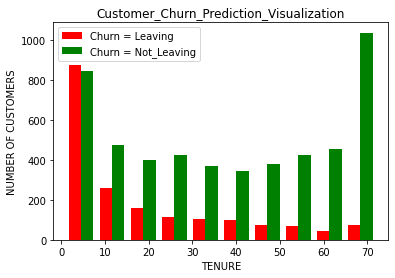

In [ ]:
tenure_churn_no =df[df.Churn=='No'].tenure
tenure_churn_yes =df[df.Churn=='Yes'].tenure

from matplotlib import pyplot as plt
%matplotlib inline

plt.xlabel("TENURE")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.title("Customer_Churn_Prediction_Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], label=['Churn = Leaving', 'Churn = Not_Leaving'])
plt.legend()

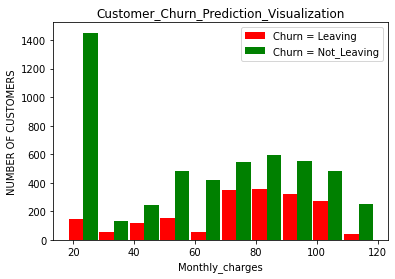

In [ ]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly_charges")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.title("Customer_Churn_Prediction_Visualization")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red', 'green'], label=['Churn = Leaving', 'Churn = Not_Leaving'])
plt.legend()

In [ ]:
def print_unique_columns(df):
    for column in df:
       if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

## **Recreating the Data**

In [ ]:
print_unique_columns(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
df.replace('No internet service','No', inplace=True)
df.replace('No phone service','No', inplace=True)

In [ ]:
yes_no_columns = ['PhoneService', 'MultipleLines', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df[col].replace({"Yes": 1, "No": 0}, inplace=True)

In [ ]:
df['gender'].replace({"Female":1, "Male":0}, inplace = True)

## **One Hot Encoding**

In [ ]:
df = pd.get_dummies(data= df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

## **Scaling tha Data**

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## **SMOTE**

In [ ]:
churn_yes = df[df.Churn == 0]
churn_no = df[df.Churn != 0]
print(len(churn_yes), len(churn_no))

5163 1869


In [ ]:
X = df.drop('Churn',axis='columns')
y = df['Churn']
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)
print(len(X_sm), len(y_sm))

10326 10326


## **Splitting the Data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

## **Intoducing ANN to train the model**

In [ ]:
pip install tensorflow-addons

     |████████████████████████████████| 679 kB 5.6 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow_addons import losses
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
    min_loss = 1000
    weights = -1
    model = keras.Sequential([
        keras.layers.Dense(32, input_dim=26, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(26, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(13, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(7, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    if weights == -1:
        model.fit(X_train, y_train, epochs=100, batch_size=16)
    else:
        model.fit(X_train, y_train, epochs=100, batch_size=16, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

Epoch 1/100
517/517 [==============================] - 2s 2ms/step - loss: 0.6494 - accuracy: 0.6165
Epoch 2/100
517/517 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7335
Epoch 3/100
517/517 [==============================] - 1s 2ms/step - loss: 0.5302 - accuracy: 0.7496
Epoch 4/100
517/517 [==============================] - 1s 2ms/step - loss: 0.5189 - accuracy: 0.7515
Epoch 5/100
517/517 [==============================] - 1s 2ms/step - loss: 0.5065 - accuracy: 0.7611
Epoch 6/100
517/517 [==============================] - 1s 2ms/step - loss: 0.4985 - accuracy: 0.7676
Epoch 7/100
517/517 [==============================] - 1s 2ms/step - loss: 0.4947 - accuracy: 0.7696
Epoch 8/100
517/517 [==============================] - 1s 2ms/step - loss: 0.4951 - accuracy: 0.7680
Epoch 9/100
517/517 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.7714
Epoch 10/100
517/517 [==============================] - 1s 2ms/step - loss: 0.4846 - accura

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      1033
           1       0.77      0.79      0.78      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



In [ ]:
y_test[:10]

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
yp = model.predict(X_test)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[1, 0, 1, 1, 0, 0, 0, 1, 1, 1]

Text(69.0, 0.5, 'Truth')

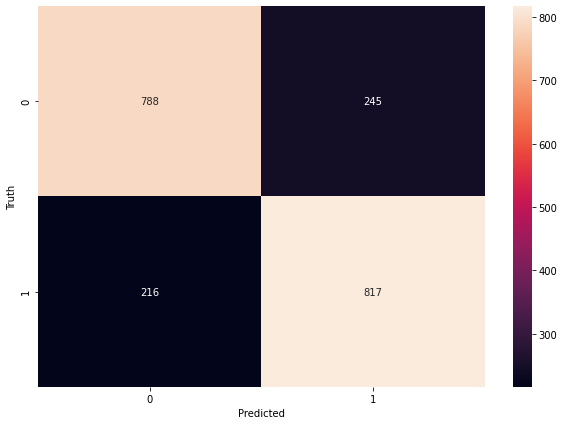

In [ ]:
import seaborn as sb
c_m = tf.math.confusion_matrix(labels=y_test, predictions = y_pred)

plt.figure(figsize = (10, 7))
sb.heatmap(c_m, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')